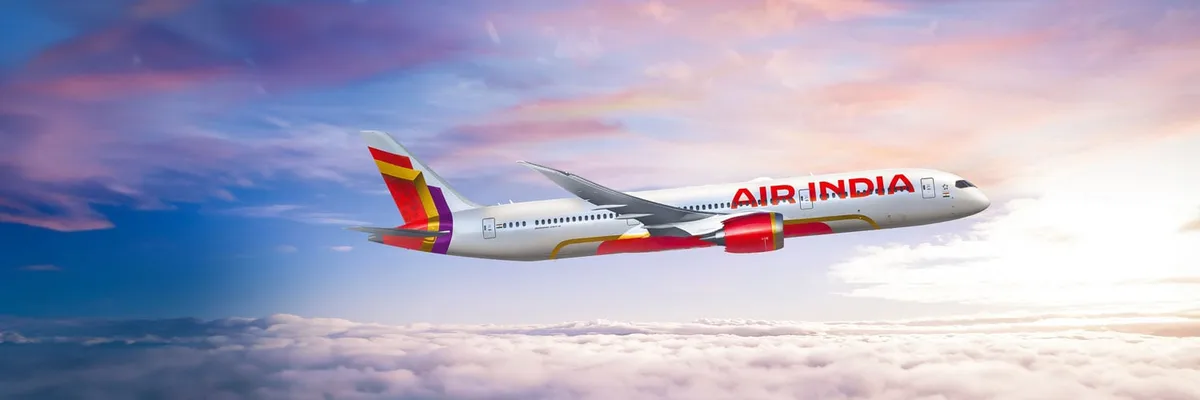

**FLIGHT TICKET PRICE PREDICTION**

The main objective of this machine learning project is to build and compare different regression models to accurately predict flight ticket prices. The goal is to develop a reliable model that estimates ticket prices based on various features such as airline, departure time, duration, number of stops, and booking time. This model will help both passengers and airlines make informed pricing decisions, optimize ticket purchases, and improve market transparency.

**FEATURES**

The various features of the cleaned dataset are explained below:

1. **Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. **Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature.
3. **Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. **Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. **Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. **Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. **Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities.
8. **class1:** A categorical feature that contains information on seat class1; it has two distinct values: Business and Economy.
9. **Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. **Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. **Price:** Target variable stores information of the ticket price.

# **IMPORT DATASET**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/main project/Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class1,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# **DATA PREPROCESSING**

In [ ]:
df.head(1)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class1,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [ ]:
df.tail(1)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class1,duration,days_left,price
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class1            300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.ndim

2

In [ ]:
df.shape

(300153, 12)

In [ ]:
df.index

RangeIndex(start=0, stop=300153, step=1)

In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class1', 'duration',
       'days_left', 'price'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class1,0
duration,0


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class1', 'duration', 'days_left',
       'price'],
      dtype='object')

# **DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

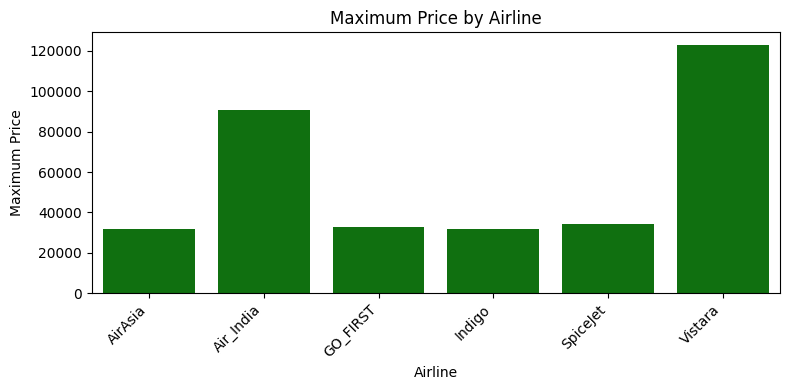

In [ ]:
df_max_price = df.groupby('airline')['price'].max().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='airline', y='price', data=df_max_price,color='green')
plt.xlabel('Airline')
plt.ylabel('Maximum Price')
plt.title('Maximum Price by Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


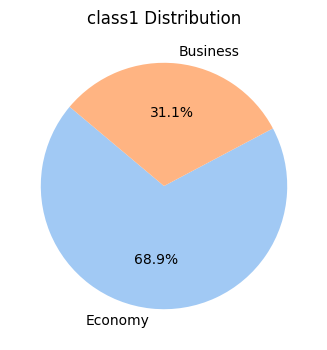

In [ ]:
class1_distribution = df['class1'].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(class1_distribution, labels=class1_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('class1 Distribution')
plt.show()


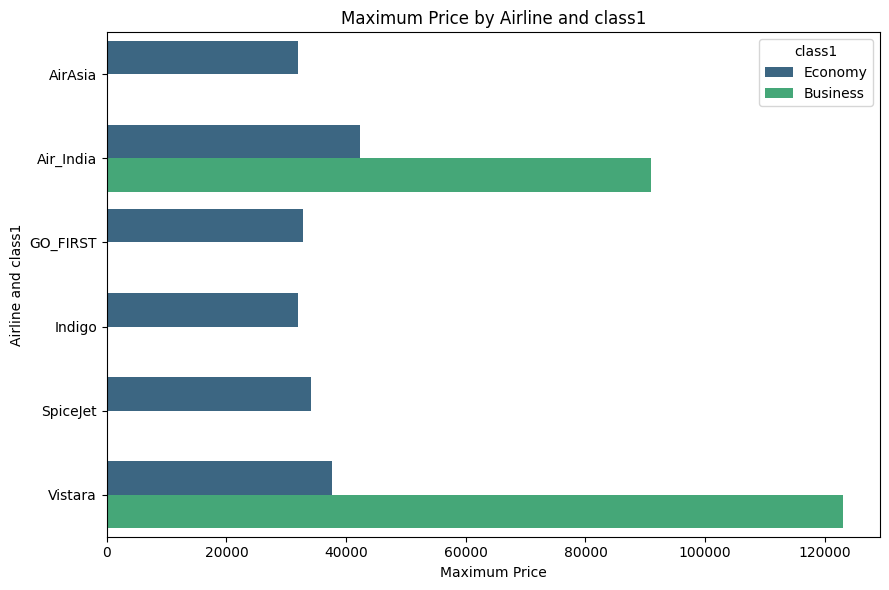

In [ ]:

df_max_price = df.groupby(['airline', 'class1'])['price'].max().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(y='airline', x='price', hue='class1', data=df_max_price, palette='viridis')
plt.ylabel('Airline and class1')
plt.xlabel('Maximum Price')
plt.title('Maximum Price by Airline and class1')
plt.tight_layout()
plt.show()


<ipython-input-19-ecbcff92ae9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class1', y='price', data=average_prices, palette='viridis')


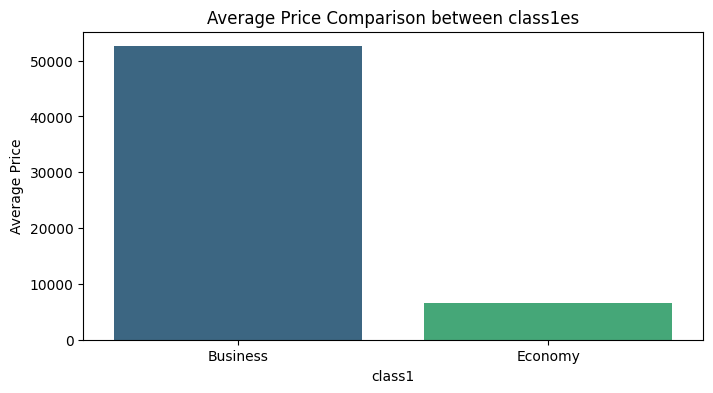

In [ ]:
average_prices = df.groupby('class1')['price'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='class1', y='price', data=average_prices, palette='viridis')
plt.xlabel('class1')
plt.ylabel('Average Price')
plt.title('Average Price Comparison between class1es')
plt.show()


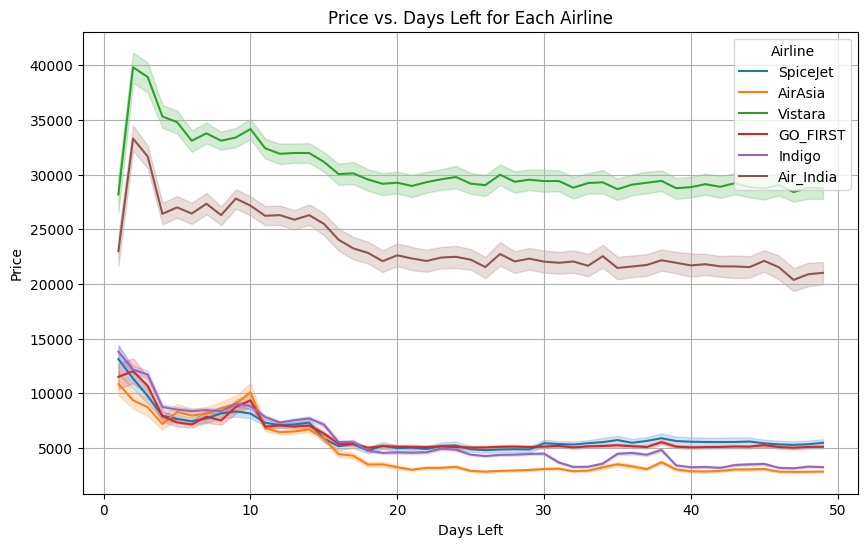

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='days_left', y='price', hue='airline')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Price vs. Days Left for Each Airline')
plt.legend(title='Airline')
plt.grid(True)
plt.show()


# **Feature Encoding**


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class1,object
duration,float64
days_left,int64


## **AIRLINE**

In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
one1 = OneHotEncoder(sparse_output=False)
one1.fit(df[['airline']])
one1_output = one1.transform(df[['airline']])

In [ ]:
one1.get_feature_names_out()

array(['airline_AirAsia', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara'],
      dtype=object)

In [ ]:
new_airline = pd.DataFrame(one1_output , columns=one1.get_feature_names_out())

new_airline = new_airline.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.concat([df,new_airline],axis=1)

In [ ]:
df.drop('airline',axis=1,inplace=True)

In [ ]:
df.head(1)

,flight,source_city,departure_time,stops,arrival_time,destination_city,class1,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0


### **FLIGHT**

In [ ]:
df['flight'].value_counts()

,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
...,...
SG-9923,1
6E-6474,1
6E-865,1


In [ ]:
la1 = LabelEncoder()
la1.fit(df['flight'])
df['flight'] = la1.transform(df['flight'])

In [ ]:
df.head(1)

,flight,source_city,departure_time,stops,arrival_time,destination_city,class1,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,1408,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0


#### **SOURCE_CITY**

In [ ]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
one2 = OneHotEncoder(sparse_output=False)
one2.fit(df[['source_city']])
one2_output = one2.transform(df[['source_city']])

In [ ]:
one2.get_feature_names_out()

array(['source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai'], dtype=object)

In [ ]:
new_source_city = pd.DataFrame(one2_output , columns=one2.get_feature_names_out())

new_source_city = new_source_city.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.concat([df,new_source_city],axis=1)

In [ ]:
df.drop('source_city',axis=1,inplace=True)

In [ ]:
df.head(1)

,flight,departure_time,stops,arrival_time,destination_city,class1,duration,days_left,price,airline_AirAsia,...,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,1408,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##### **DAPARTURE_TIME**

In [ ]:
df['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
one3 = OneHotEncoder(sparse_output=False)
one3.fit(df[['departure_time']])
one3_output = one3.transform(df[['departure_time']])

In [ ]:
one3.get_feature_names_out()

array(['departure_time_Afternoon', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night'], dtype=object)

In [ ]:
new_departure_time = pd.DataFrame(one3_output , columns=one3.get_feature_names_out())

new_departure_time = new_departure_time.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.concat([df,new_departure_time],axis=1)

In [ ]:
df.drop('departure_time',axis=1,inplace=True)

In [ ]:
df.head(1)

,flight,stops,arrival_time,destination_city,class1,duration,days_left,price,airline_AirAsia,airline_Air_India,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,1408,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###### **STOPS**

In [ ]:
df['stops'].value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
one4 = OneHotEncoder(sparse_output=False)
one4.fit(df[['stops']])
one4_output = one4.transform(df[['stops']])

In [ ]:
one4.get_feature_names_out()

array(['stops_one', 'stops_two_or_more', 'stops_zero'], dtype=object)

In [ ]:
new_stops = pd.DataFrame(one4_output , columns=one4.get_feature_names_out())

new_stops = new_stops.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.concat([df,new_stops],axis=1)

In [ ]:
df.drop('stops',axis=1,inplace=True)

In [ ]:
df.head(1)

,flight,arrival_time,destination_city,class1,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero
0,1408,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


###### **ARRIVAL_TIME**


In [ ]:
one5 = OneHotEncoder(sparse_output=False)
one5.fit(df[['arrival_time']])
one5_output = one5.transform(df[['arrival_time']])

In [ ]:
one5.get_feature_names_out()

array(['arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night'], dtype=object)

In [ ]:
new_arrival_time = pd.DataFrame(one5_output , columns=one5.get_feature_names_out())

new_arrival_time = new_arrival_time.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.concat([df,new_arrival_time],axis=1)

In [ ]:
df.drop('arrival_time',axis=1,inplace=True)

In [ ]:
df.head(1)

,flight,destination_city,class1,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,1408,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


###### **DESTINATION_CITY**

In [ ]:
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
one6 = OneHotEncoder(sparse_output=False)
one6.fit(df[['destination_city']])
one6_output = one6.transform(df[['destination_city']])

In [ ]:
one6.get_feature_names_out()

array(['destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai'],
      dtype=object)

In [ ]:
new_destination_city = pd.DataFrame(one6_output , columns=one6.get_feature_names_out())

new_destination_city = new_destination_city.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.concat([df,new_destination_city],axis=1)

In [ ]:
df.drop('destination_city',axis=1,inplace=True)

In [ ]:
df.head(1)

,flight,class1,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1408,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


###### **class1**

In [ ]:
df['class1'].value_counts()

,count
class1,
Economy,206666
Business,93487


In [ ]:
la2 = LabelEncoder()
la2.fit(df['class1'])
df['class1'] = la2.transform(df['class1'])

In [ ]:
df.head(1)

,flight,class1,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1408,1,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
for col in df.columns:
    if df[col].dtype not in [float, int]:
        print("Object found!!")
        break
else:
    print("All are correct")

All are correct


# **CORRELATION**


In [ ]:
cor = df.corr()['price']
cor

,price
flight,0.305888
class1,-0.937860
duration,0.204222
days_left,-0.091949
price,1.000000
airline_AirAsia,-0.176188
airline_Air_India,0.070041
airline_GO_FIRST,-0.194179
airline_Indigo,-0.280882
airline_SpiceJet,-0.114019


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

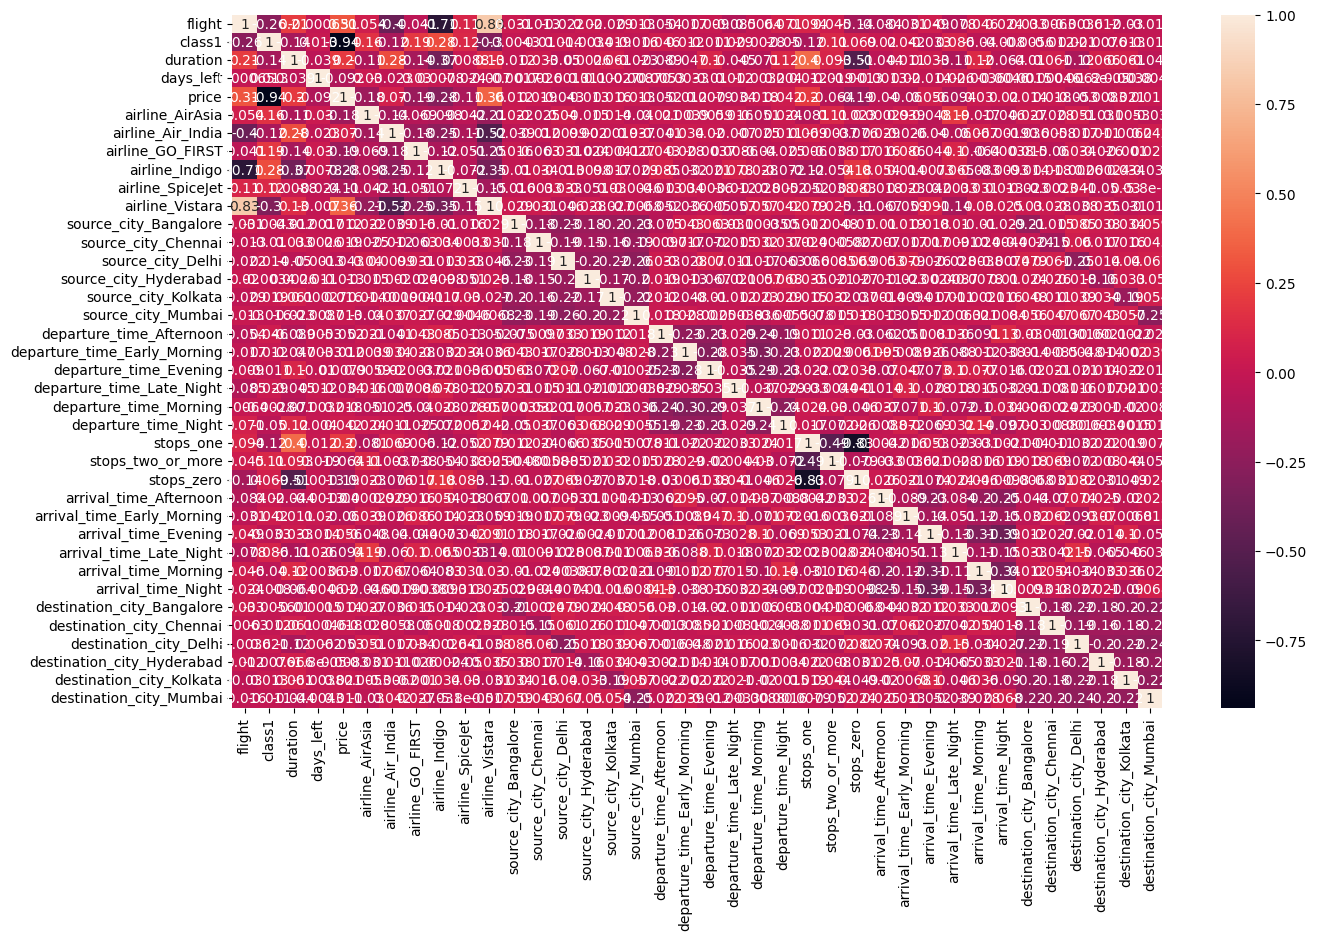

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **OUTLIERS**



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

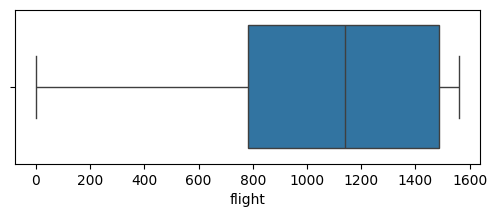

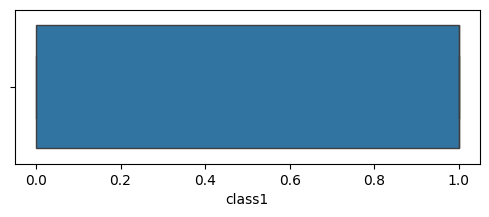

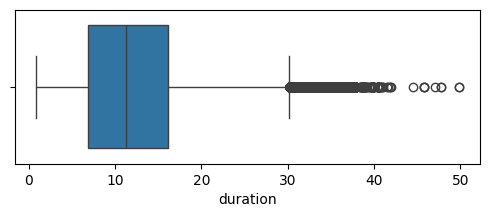

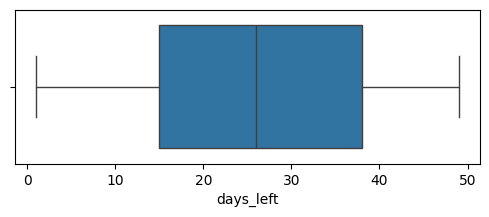

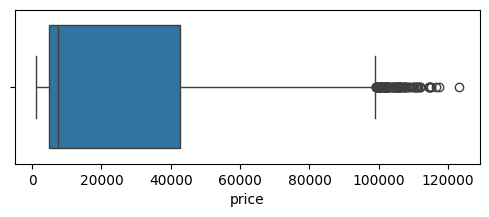

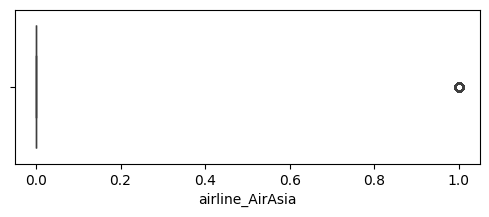

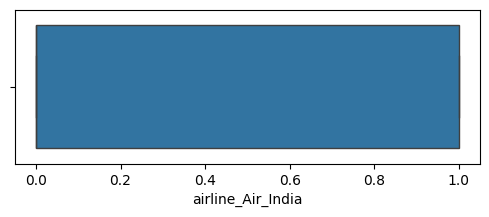

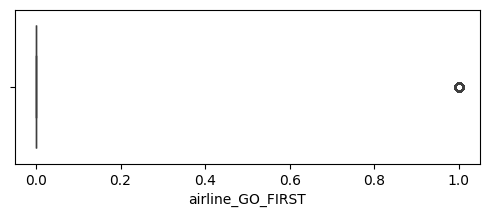

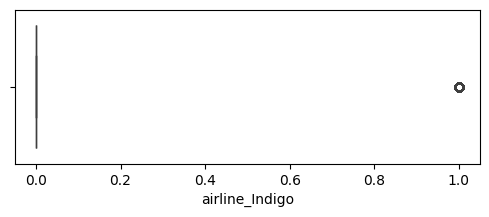

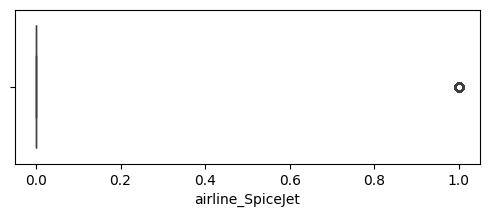

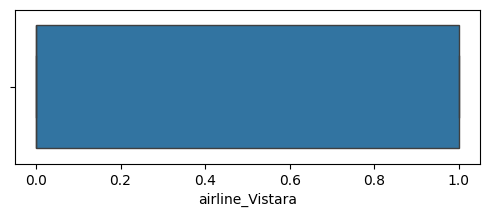

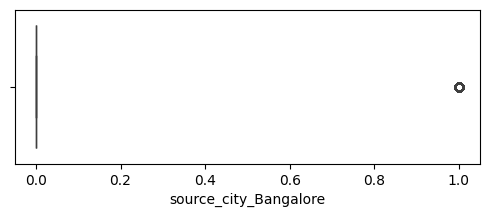

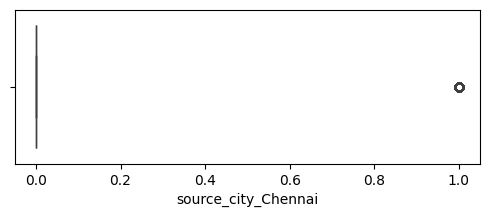

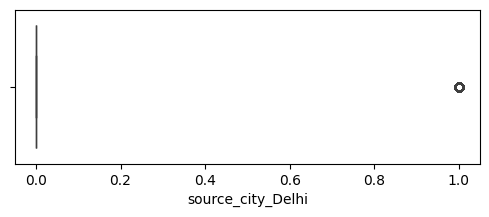

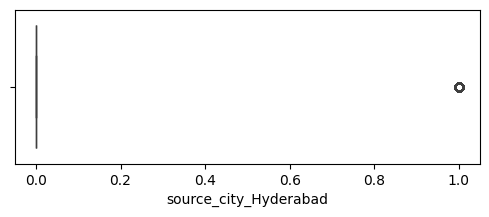

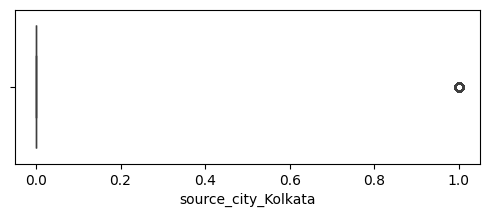

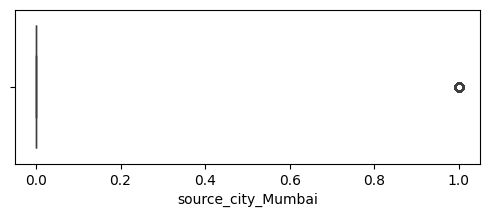

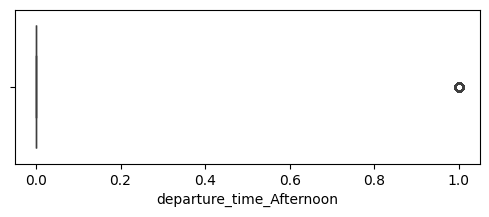

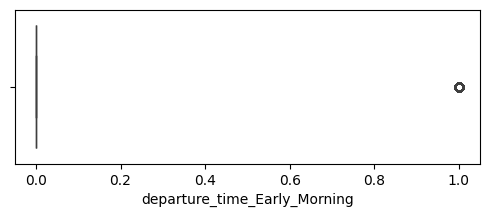

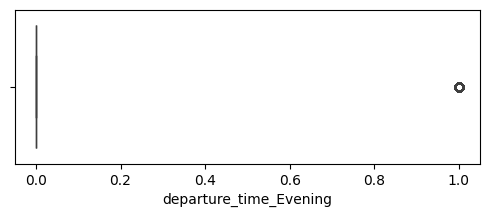

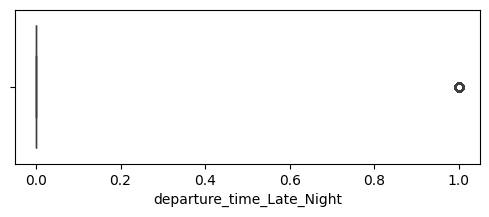

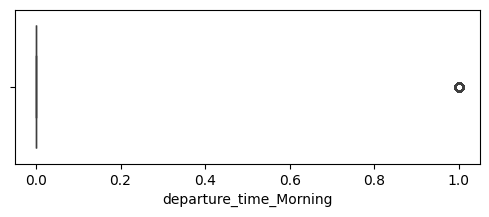

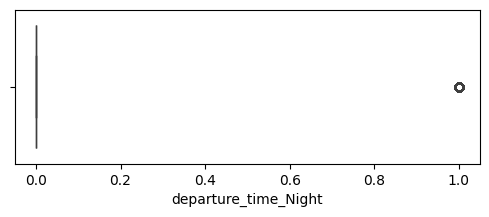

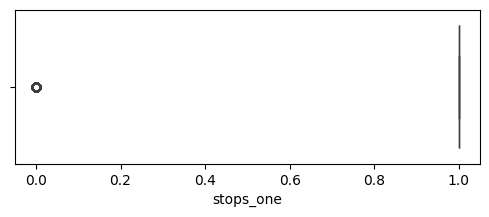

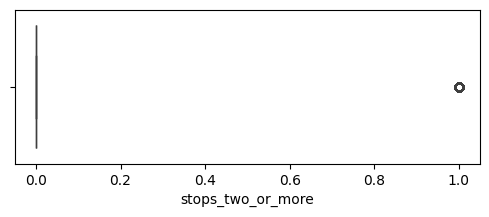

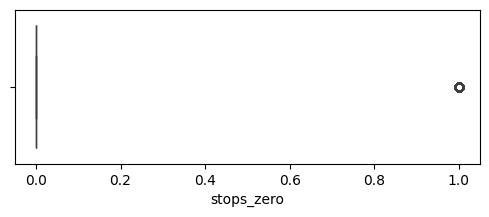

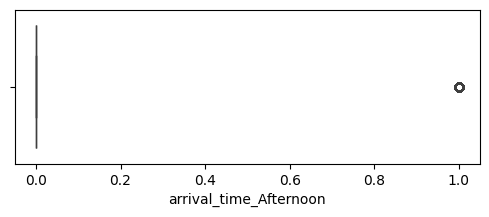

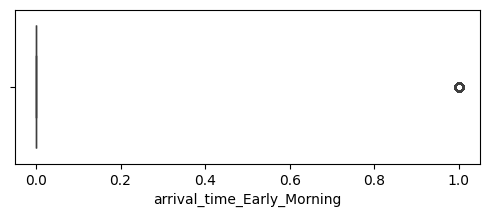

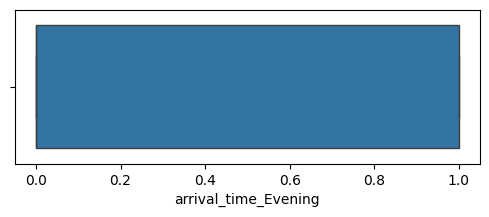

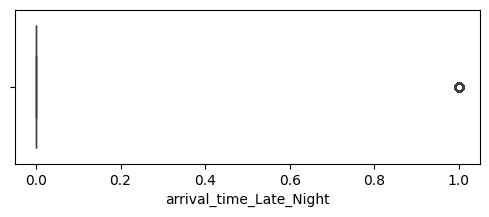

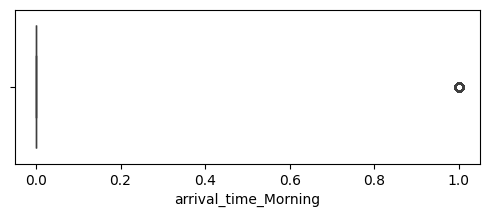

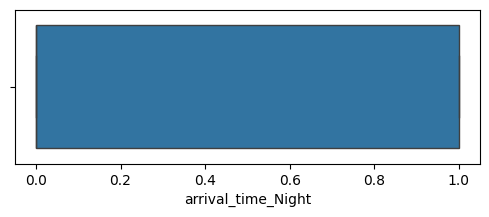

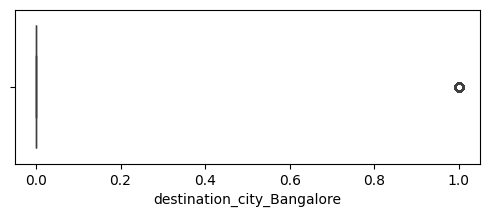

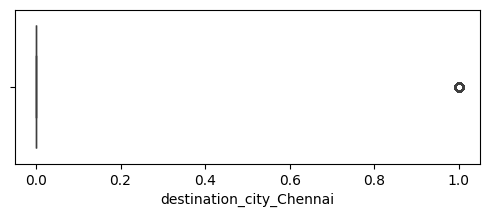

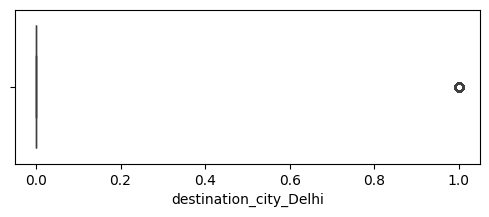

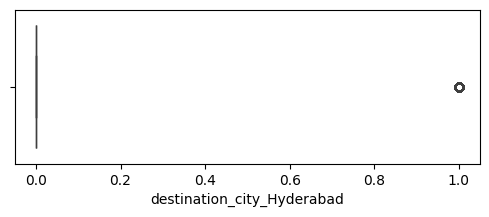

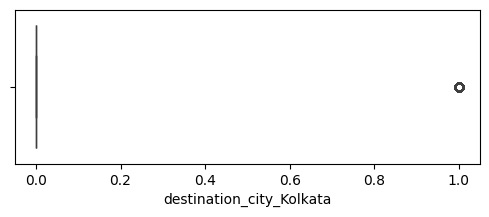

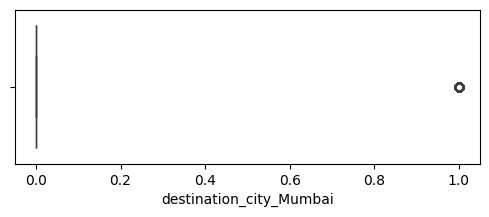

In [ ]:
for col in df.columns:
  plt.figure(figsize=(6,2))
  sns.boxplot(x=df[col])
  plt.show()

In [ ]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

print('lower quartile         = ',Q1)
print('upper quartile         = ',Q3)
print('interquartile range    = ',IQR)

print('---'*50)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

lower quartile         =  6.83
upper quartile         =  16.17
interquartile range    =  9.340000000000002
------------------------------------------------------------------------------------------------------------------------------------------------------


* Currently, the longest commercial nonstop flight is around 19 hours, and no aircraft is capable of flying 50 hours nonstop due to fuel, crew, and passenger limitations.

In [ ]:
data = df[(df['duration'] >=19)]
data

,flight,class1,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
35,1460,1,23.17,1,12150,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,1470,1,24.17,1,12150,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,744,1,19.08,1,12150,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42,748,1,22.83,1,12150,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43,857,1,26.42,1,12150,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300137,1492,0,25.83,49,51457,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
300138,1486,0,26.33,49,51457,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300139,1488,0,26.42,49,51457,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300145,716,0,23.08,49,51345,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **DATA SPLIT**



In [ ]:
x = data.drop('price',axis=1)
y = data['price']


# **SCALING**



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sd = StandardScaler()
sd.fit(x)
x = sd.transform(x)

# **TRAIN-TEST SPLIT**



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **MODEL BUILDING**

# **KNN MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
import matplotlib.pyplot as plt

## **RANDOMSEARCH CV**

In [ ]:
hyperknn = KNeighborsRegressor()

In [ ]:
parameter = {'n_neighbors':randint(2,11),
             'weights':['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size':randint(2,11),
             'metric':['euclidean', 'manhattan', 'minkowski'],
             }

In [ ]:
Randomcv = RandomizedSearchCV(hyperknn,param_distributions=parameter,cv=5,scoring='r2')
Randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6f5645f50>,
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6f5645810>,
                                        'weights': ['uniform', 'distance']},
                   scoring='r2')

In [ ]:
print(Randomcv.best_params_)
print(Randomcv.best_score_)

{'algorithm': 'kd_tree', 'leaf_size': 3, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.9659009249040966


### **MODEL BUILDING**

In [ ]:
new_hyp_knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size = 2, metric = 'manhattan', n_neighbors = 8, weights = 'distance')
new_hyp_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=2, metric='manhattan',
                    n_neighbors=8, weights='distance')

In [ ]:
pred_hpp_knn = new_hyp_knn.predict(x_test)
pred_hpp_knn

array([54023.37447441,  4146.00109253, 69631.5492607 , ...,
       39499.        ,  8550.3625563 , 11646.92975207])

#### **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

In [ ]:

print('r2_score : ',r2_score(y_test,pred_hpp_knn))
print('mean_absolute_error : ',mean_absolute_error(y_test,pred_hpp_knn))
print('mean_squared_error : ',mean_squared_error(y_test,pred_hpp_knn))
print('root_mean_squared_error : ',root_mean_squared_error(y_test,pred_hpp_knn))

r2_score :  0.9706277269790697
mean_absolute_error :  1709.801683358281
mean_squared_error :  15217865.587607985
root_mean_squared_error :  3901.0082783311273


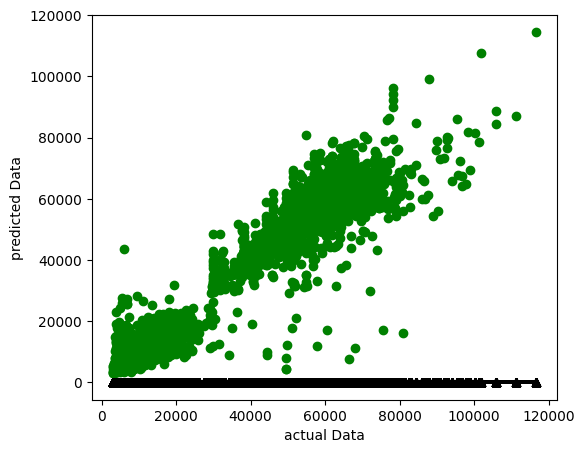

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,pred_hpp_knn,color='g')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2,marker='^')
plt.xlabel('actual Data')
plt.ylabel('predicted Data')
plt.show()

# **DECISION TREE MODEL**

## **RANDOMSEARCH CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor

In [ ]:
hyperdt =  DecisionTreeRegressor()

In [ ]:
parameter_dt = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
                'splitter':["best", "random"],
                'max_depth':randint(3,11),
                'min_samples_split':randint(2,11),
                'min_samples_leaf':randint(2,11),
                'max_features':randint(1,11),
                }

In [ ]:
random_dt = RandomizedSearchCV(hyperdt,param_distributions=parameter_dt,cv=5,scoring='r2')
random_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6f46f6f90>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6f470a0d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6f470b8d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6f4698850>,
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [ ]:
print(random_dt.best_params_)
print(random_dt.best_score_)

{'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'best'}
0.8801049930243885


### **MODEL BUILDING**

In [ ]:
model_dt_hyper = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 8, max_features = 7, min_samples_leaf = 8, min_samples_split = 4, splitter = 'best')
model_dt_hyper.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features=7, min_samples_leaf=8,
                      min_samples_split=4)

In [ ]:
new_dt_model = model_dt_hyper.predict(x_test)
new_dt_model

array([34865.76952823, 21116.18563512, 56122.56972955, ...,
       56122.56972955,  5712.45454545,  8007.95254721])

#### **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error


In [ ]:

print('r2_score : ',r2_score(y_test,new_dt_model))
print('mean_absolute_error : ',mean_absolute_error(y_test,new_dt_model))
print('mean_squared_error : ',mean_squared_error(y_test,new_dt_model))
print('root_mean_squared_error : ',root_mean_squared_error(y_test,new_dt_model))

r2_score :  0.6255953305804944
mean_absolute_error :  9931.562146803311
mean_squared_error :  193980218.36916682
root_mean_squared_error :  13927.678139918615


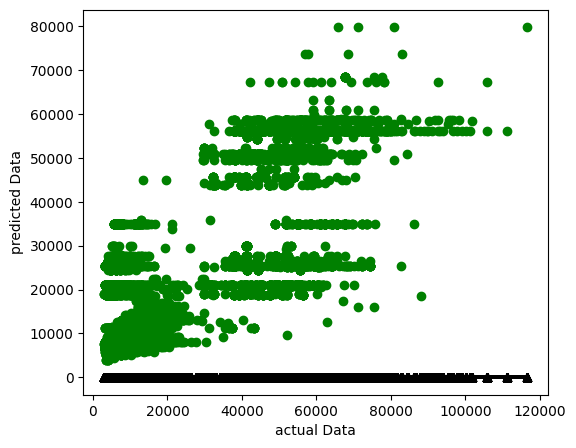

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,new_dt_model,color='g')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2,marker='^')
plt.xlabel('actual Data')
plt.ylabel('predicted Data')
plt.show()

# **SVM MODEL**

## **RANDOMSEARCH CV**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVR


In [ ]:
hyp_svm = SVR()

In [ ]:

parameter_svm = {
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'C': randint(1, 6),
    'shrinking': [True, False]
}

In [ ]:
random_sv = RandomizedSearchCV(hyp_svm,param_distributions=parameter_svm,cv=2,scoring='r2',n_iter=5)
random_sv.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=SVR(), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6f4775690>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf'],
                                        'shrinking': [True, False]},
                   scoring='r2')

In [ ]:
print(random_sv .best_params_)
print(random_sv .best_score_)

{'C': 4, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': False}
0.9149327532795113


### **MODEL BUILDING**

In [ ]:
hyper_svm = SVR(C = 5, gamma = 'scale', kernel = 'linear', shrinking = True)
hyper_svm.fit(x_train,y_train)

SVR(C=5, kernel='linear')

In [ ]:
new_svm_pred = hyper_svm.predict(x_test)
new_svm_pred

array([52597.99947246,  4052.7576754 , 50196.9139743 , ...,
       47438.51395615,  2780.7743189 , 10320.45578905])

#### **MODEL EVAUATION**

In [ ]:
print('r2_score : ',r2_score(y_test,new_svm_pred))
print('mean_absolute_error : ',mean_absolute_error(y_test,new_svm_pred))
print('mean_squared_error : ',mean_squared_error(y_test,new_svm_pred))
print('root_mean_squared_error : ',root_mean_squared_error(y_test,new_svm_pred))

r2_score :  0.9189440567743654
mean_absolute_error :  4183.991034196682
mean_squared_error :  41995335.131384596
root_mean_squared_error :  6480.380785986623


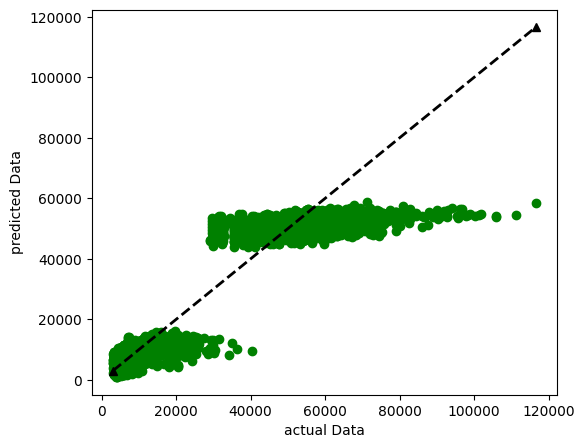

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,new_svm_pred,color='g')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2,marker='^')
plt.xlabel('actual Data')
plt.ylabel('predicted Data')
plt.show()

# **ADABOOST MODEL**

## **RANDOMSEARCH CV**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform
from sklearn.tree import DecisionTreeRegressor

In [ ]:
hyper_ada = AdaBoostRegressor()

In [ ]:
parameter_ada = {'n_estimators':randint(1,101),
       'learning_rate':uniform(0.01,0.98),
       'loss':['linear', 'square', 'exponential'],
       'random_state':randint(1,43)}

In [ ]:
random_ada = RandomizedSearchCV(hyper_ada,param_distributions=parameter_ada,cv=5,scoring='r2')
random_ada.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bc6fd2a9350>,
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6fd185a90>,
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc6ff59e310>},
                   scoring='r2')

In [ ]:
print(random_ada.best_params_)
print(random_ada.best_score_)

{'learning_rate': 0.322149238698357, 'loss': 'exponential', 'n_estimators': 7, 'random_state': 37}
0.9356412992562921


### **MODEL BUILDING**

In [ ]:
new_ada_model=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),learning_rate= 0.24288086316984472, loss= 'linear', n_estimators= 31, random_state= 41)
new_ada_model.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),
                  learning_rate=0.24288086316984472, n_estimators=31,
                  random_state=41)

In [ ]:
new_pred_ada = new_ada_model.predict(x_test)
new_pred_ada

array([56479.60490694,  5580.87220714, 64655.83742633, ...,
       44233.38996929,  5568.38480663, 12891.74739864])

#### **MODEL EVALUATION**

In [ ]:
print('r2_score : ',r2_score(y_test,new_pred_ada))
print('mean_absolute_error : ',mean_absolute_error(y_test,new_pred_ada))
print('mean_squared_error : ',mean_squared_error(y_test,new_pred_ada))
print('root_mean_squared_error : ',root_mean_squared_error(y_test,new_pred_ada))

r2_score :  0.9560814017998567
mean_absolute_error :  3174.046750170575
mean_squared_error :  22754361.697839584
root_mean_squared_error :  4770.153215342206


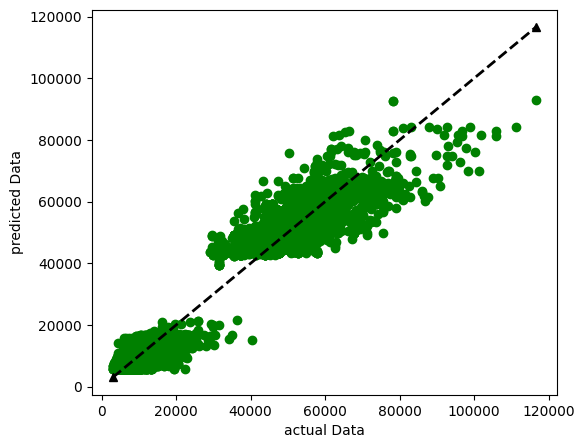

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,new_pred_ada,color='g')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2,marker='^')
plt.xlabel('actual Data')
plt.ylabel('predicted Data')
plt.show()

# **LINEAR REGRESSOR MODEL**

## **RANDOMSEARCH CV**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [ ]:
hypr_lr = LinearRegression()

In [ ]:
parameter_lr = {'fit_intercept':[True,False],'positive':[True,False],'copy_X':[True,False],'n_jobs':randint(1,11)}

In [ ]:
random_lr = RandomizedSearchCV(hypr_lr,parameter_lr,cv=5,scoring='r2')
random_lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 640, in fit
    self.coef_ = optimize.nnls(

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc73b9ed810>,
                                        'positive': [True, False]},
                   scoring='r2')

In [ ]:
print(random_lr.best_params_)
print(random_lr.best_score_)

{'copy_X': False, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}
0.926822122055496


### **MODEL BUILDING**

In [ ]:
new_model_lr = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, positive = False)
new_model_lr.fit(x_train,y_train)

LinearRegression(n_jobs=1)

In [ ]:
pred_lr_new = new_model_lr.predict(x_test)
pred_lr_new

array([55835.79016189,  1188.08581846, 54253.25558688, ...,
       46841.49754834,  1318.63811307, 10513.64679576])

#### **MODEL EVALUATION**

In [ ]:
print('r2_score : ',r2_score(y_test,pred_lr_new))
print('mean_absolute_error : ',mean_absolute_error(y_test,pred_lr_new))
print('mean_squared_error : ',mean_squared_error(y_test,pred_lr_new))
print('root_mean_squared_error : ',root_mean_squared_error(y_test,pred_lr_new))

r2_score :  0.924306221446182
mean_absolute_error :  4345.006691782274
mean_squared_error :  39217181.013854146
root_mean_squared_error :  6262.362255080278


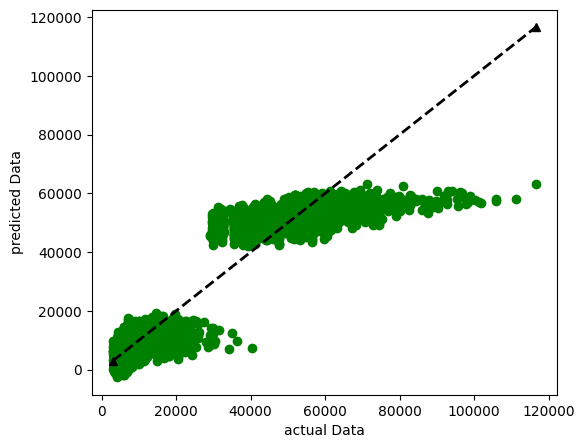

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,pred_lr_new,color='g')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2,marker='^')
plt.xlabel('actual Data')
plt.ylabel('predicted Data')
plt.show()

# **VISUALIZE MODEL COMPARISON**

In [ ]:
KNNR2 = r2_score(y_test,pred_hpp_knn)
DTR2 = r2_score(y_test,new_dt_model)
SVRR2 = r2_score(y_test,new_svm_pred)
ADAR2 = r2_score(y_test,new_pred_ada)
LRR2 = r2_score(y_test,pred_lr_new)


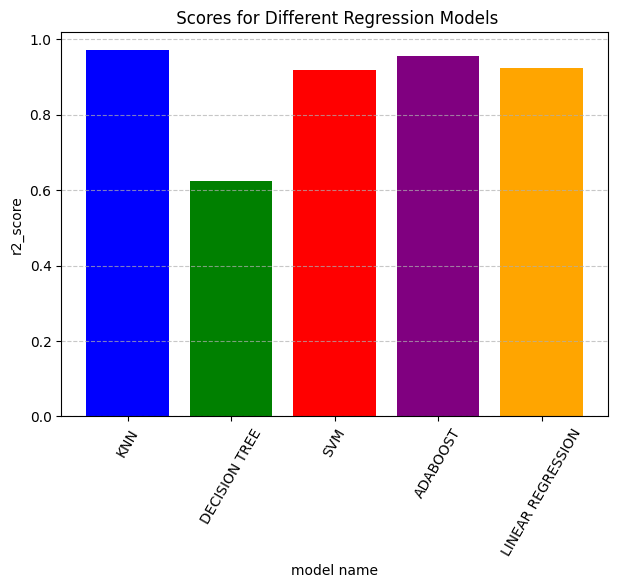

In [ ]:
visual=['KNN','DECISION TREE','SVM','ADABOOST','LINEAR REGRESSION']
result=[KNNR2,DTR2,SVRR2,ADAR2,LRR2]
plt.bar(visual,result,color = ['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('model name')
plt.ylabel('r2_score')
plt.title(' Scores for Different Regression Models')
plt.tight_layout()
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Conclusion:**

In this analysis, we aimed to predict flight ticket price using a dataset containing various features related to flights.**The KNN model**, achieving an **accuracy of 97%,** emerged as the bestperforming model for predicting.

# gui

In [ ]:
import pickle

pickle.dump(new_hyp_knn, open('model.sav', 'wb'))

In [ ]:
import pickle

pickle.dump(sd, open('scale.sav', 'wb'))

In [ ]:
import pickle

pickle.dump(one1, open('airline.sav', 'wb'))
pickle.dump(one2, open('source_city.sav', 'wb'))
pickle.dump(one3, open('departire_time.sav', 'wb'))
pickle.dump(one4, open('stop.sav', 'wb'))
pickle.dump(one5, open('arrival_time.sav', 'wb'))
pickle.dump(one6, open('destination_city.sav', 'wb'))
pickle.dump(la2, open('class1.sav', 'wb'))
pickle.dump(la1, open('flight.sav', 'wb'))
